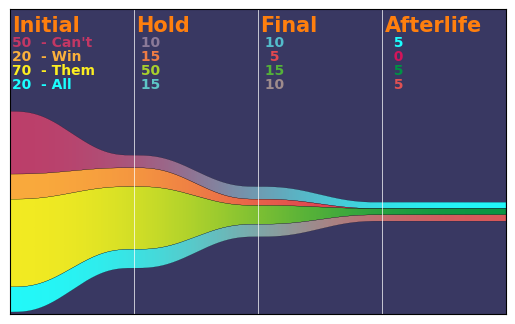

In [2]:
import matplotlib.pyplot as plt
from src.funel_graph import FunelGraph
colors = [
    ['#C33764', '#1BFFFF'],['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],['#1BFFFF', '#e05153'],
    ['#009245', '#FCEE21']
    ]

fg = FunelGraph()
fg.prepare()
fg.draw(colors=colors, apply_colorQ=True)
plt.savefig('data\example.png')
plt.show()